In [1]:
#import required libaries
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('alexa_reviews.tsv',sep='\t')

In [3]:
df.head()

,Unnamed: 0,verified_reviews,feedback
0,0,Love my Echo!,1
1,1,Loved it!,1
2,2,"Sometimes while playing a game, you can answer...",1
3,3,I have had a lot of fun with this thing. My 4 ...,1
4,4,Music,1


In [4]:
#delete unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
#check null values
df.isnull().sum()

verified_reviews    0
feedback            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [7]:
#create word cloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

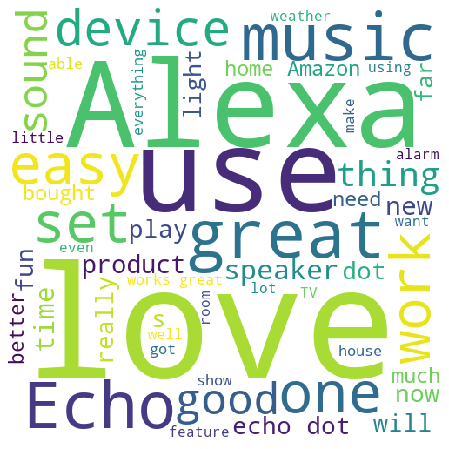

In [8]:
#Create object of WordCloud class  for +ve sentence/review
wc=WordCloud(background_color="white",min_font_size=15,width=500,height=500,stopwords=STOPWORDS)
wc.generate("".join(df[df['feedback']==1]['verified_reviews']))
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

(-0.5, 499.5, 499.5, -0.5)

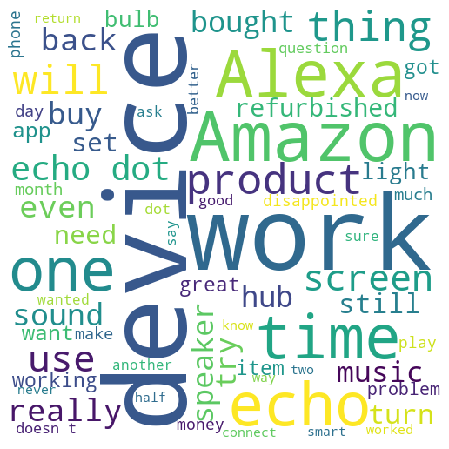

In [9]:
#Create object of WordCloud class  for -ve sentence/review
wc=WordCloud(background_color="white",height=500,width=500,min_font_size=15,stopwords=STOPWORDS)
wc.generate("".join(df[df['feedback']==0]['verified_reviews']))
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')

In [10]:
from nltk.stem import WordNetLemmatizer
from string import punctuation

In [11]:
# data cleaning function create for clean the document
def cleaned_text(text):
    stop=stopwords.words("english") #stopwords list
    punc=list(punctuation)
    bad_token=stop+punc
    lemma=WordNetLemmatizer()
    tokens=word_tokenize(text) # tokenization
    word_tokens=[t for t in tokens if t.isalpha()] # removing numbers 
    # lemmatization,  stopwords & punctuation removal, to lower case
    clean_token=[lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_token]
    return ' '.join(clean_token)

In [12]:
#call function 
df['verified_reviews']=df['verified_reviews'].apply(cleaned_text)
df['verified_reviews']

0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3       i lot fun thing my yr old learns dinosaur cont...
4                                                   music
                              ...                        
3145                           perfect kid adult everyone
3146    listening music searching location checking ti...
3147    i love thing running entire home tv light ther...
3148    only complaint i sound quality great i mostly ...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [13]:
#separate input and output from dataset
X=df['verified_reviews'] #input
Y=df['feedback'] #output

In [14]:
#train test split (70-30%  , 75-25% and 80%-20%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [15]:
#no. of words in given senetence
sent_len=[]
for sent in df['verified_reviews']:
    sent_len.append(len(word_tokenize(sent)))
#to add new column in existing dataset   
df['sent_len']=sent_len

In [16]:
df.head()

,verified_reviews,feedback,sent_len
0,love echo,1,2
1,loved,1,1
2,sometimes playing game answer question correct...,1,18
3,i lot fun thing my yr old learns dinosaur cont...,1,21
4,music,1,1


In [17]:
max(sent_len)

276

In [18]:
df['sent_len'].unique()

array([  2,   1,  18,  21,  20,  38,  25,  15,   7,  23,   3,   4,  10,
        42,  43,   9,   8,  34,  28,  14,  52,  11,  17,  19,  12,   5,
         0,  22,   6,  16,  81,  26,  13,  62,  29,  32,  30,  24,  55,
        92,  46,  53,  33,  48,  66,  31,  27,  50,  56,  45,  37,  36,
        99, 100,  49,  60,  44,  57,  35,  40, 178,  67,  39,  41,  85,
        61,  47,  68,  83,  51,  79,  65,  63,  70,  98,  77, 224,  91,
       116, 180, 103,  73,  58,  87, 104,  71,  64, 130,  74,  78,  69,
        97, 112, 148, 122, 135, 143, 176,  54, 136, 276, 109,  59, 162,
        72], dtype=int64)

In [19]:
df['sent_len'].value_counts()

2      291
4      232
3      208
6      189
5      178
      ... 
122      1
116      1
112      1
104      1
180      1
Name: sent_len, Length: 105, dtype: int64

In [20]:
np.quantile(sent_len,0.95)#taken sentence only 95% and 5% sacrify

47.0

In [21]:
# We can see that 95% review text are of lengths less than or equal to 47. We'll keep the max length
#to 47
max_len = 47

In [22]:
#tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [23]:
#Tokenization
#create object of Tokenizer
tok=Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(x_train) #word tokenize , fit_on_texts() inbuilt method of Tokenizer

In [24]:
tok.index_word #index_word inbuilt method of Tokenizer class , Its generate unique id of each 
#and every word of sentence

{1: 'i',
 2: 'love',
 3: 'echo',
 4: 'great',
 5: 'alexa',
 6: 'work',
 7: 'music',
 8: 'it',
 9: 'like',
 10: 'use',
 11: 'sound',
 12: 'the',
 13: 'one',
 14: 'device',
 15: 'easy',
 16: 'dot',
 17: 'set',
 18: 'speaker',
 19: 'good',
 20: 'product',
 21: 'thing',
 22: 'get',
 23: 'play',
 24: 'amazon',
 25: 'time',
 26: 'would',
 27: 'home',
 28: 'still',
 29: 'we',
 30: 'really',
 31: 'light',
 32: 'show',
 33: 'day',
 34: 'prime',
 35: 'new',
 36: 'smart',
 37: 'also',
 38: 'this',
 39: 'bought',
 40: 'well',
 41: 'quality',
 42: 'better',
 43: 'much',
 44: 'room',
 45: 'fun',
 46: 'need',
 47: 'even',
 48: 'far',
 49: 'alarm',
 50: 'got',
 51: 'could',
 52: 'very',
 53: 'everything',
 54: 'plus',
 55: 'tv',
 56: 'able',
 57: 'so',
 58: 'make',
 59: 'video',
 60: 'learning',
 61: 'turn',
 62: 'feature',
 63: 'my',
 64: 'ask',
 65: 'house',
 66: 'screen',
 67: 'weather',
 68: 'buy',
 69: 'little',
 70: 'know',
 71: 'say',
 72: 'nice',
 73: 'clock',
 74: 'used',
 75: 'spot',
 76: 'p

In [25]:
sequences_train=tok.texts_to_sequences(x_train)

In [26]:
#texts_to_sequence() inbuilt function of Tokenizer class from keras library  each and every word of 
# sentences converted into a vector
sequences_train

[[19, 41, 4, 11, 41],
 [5, 832],
 [247, 7],
 [1986, 71, 319, 158, 17, 1987, 1380, 320, 42, 55, 235],
 [435],
 [2, 138, 141, 24, 610, 356],
 [26,
  144,
  51,
  61,
  21,
  131,
  66,
  1,
  236,
  307,
  75,
  24,
  690,
  226,
  1381,
  192,
  61,
  8,
  57,
  496,
  409,
  112,
  82,
  25,
  368,
  82,
  21,
  131],
 [2, 691, 6, 4],
 [1382],
 [1, 2, 74, 13, 9, 1988, 1119, 237, 410, 68, 34, 33],
 [1, 2],
 [8, 1120, 79, 466, 149, 29, 10, 392, 125, 33],
 [4, 20, 80, 567, 357, 369, 357, 1121, 1383, 756, 1122, 206],
 [15,
  17,
  10,
  1,
  39,
  108,
  13,
  65,
  13,
  216,
  162,
  1989,
  1,
  17,
  370,
  238,
  1990,
  135,
  436,
  33,
  4,
  56,
  82,
  1991],
 [12, 18, 11, 30, 19],
 [833,
  568,
  13,
  1,
  1123,
  569,
  692,
  963,
  129,
  158,
  8,
  26,
  1992,
  56,
  117,
  51,
  110,
  50,
  1384,
  611,
  612,
  287,
  437,
  411,
  5,
  95,
  757,
  1,
  371,
  1385,
  1993,
  338,
  25,
  964],
 [613, 56, 80, 109],
 [288, 523, 145, 183, 1994, 693, 32],
 [12, 132, 467]

In [27]:
df["verified_reviews"].iloc[0]

'love echo'

In [28]:
#pad_sequences() inbuilt method of sequence class
sequence_matrix_train=sequence.pad_sequences(sequences_train,maxlen=max_len)
sequence_matrix_train

array([[  0,   0,   0, ...,   4,  11,  41],
       [  0,   0,   0, ...,   0,   5, 832],
       [  0,   0,   0, ...,   0, 247,   7],
       ...,
       [  0,   0,   0, ..., 223,   4,  20],
       [  0,   0,   0, ...,   0,   0, 487],
       [  0,   0,   0, ...,   2,   3,  75]])

In [29]:
sequence_matrix_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 19, 41,  4, 11, 41])

In [30]:
vocab_len = len(tok.index_word)
vocab_len

3165

In [31]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)
sequences_matrix_test

array([[   0,    0,    0, ...,    5,  183,  499],
       [   0,    0,    0, ...,    1, 1940,  725],
       [   0,    0,    0, ...,   32,  558,   76],
       ...,
       [   0,    0,    0, ...,   33,  358,    1],
       [   0,    0,    0, ...,  275,  399, 1148],
       [   0,    0,    0, ...,  487,  727,   34]])

In [32]:
#Now create a Sequential model means goes to neural network to train the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Dropout,Embedding,LSTM,GRU
from tensorflow.keras import regularizers

# RNN

In [33]:
#create the object of Sequential class
#create the object of Sequential class
model=Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(SimpleRNN(128,activation='tanh'))  #tanh activation function use in sequential data (RNN)
model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.6))
model.add(Dense(1,activation='sigmoid'))
          

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 47, 500)           1583000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               80512     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,673,881
Trainable params: 1,673,881
Non-trainable params: 0
______________________________________________

In [35]:
from tensorflow import keras
opt=keras.optimizers.Adam(learning_rate=0.001)#specify learning rate  
#in adam learning rate we change as per our requirement to improve module accuracy
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [36]:
trained_model=model.fit(sequence_matrix_train,y_train,epochs=30,batch_size=50)

Epoch 1/30
51/51 [==============================] - 7s 98ms/step - loss: 5.7790 - accuracy: 0.8885
Epoch 2/30
51/51 [==============================] - 5s 98ms/step - loss: 2.8395 - accuracy: 0.9167
Epoch 3/30
51/51 [==============================] - 5s 101ms/step - loss: 1.0259 - accuracy: 0.9163
Epoch 4/30
51/51 [==============================] - 5s 102ms/step - loss: 0.2768 - accuracy: 0.9448
Epoch 5/30
51/51 [==============================] - 5s 101ms/step - loss: 0.1354 - accuracy: 0.9869
Epoch 6/30
51/51 [==============================] - 5s 105ms/step - loss: 0.0890 - accuracy: 0.9905
Epoch 7/30
51/51 [==============================] - 5s 102ms/step - loss: 0.0694 - accuracy: 0.9921
Epoch 8/30
51/51 [==============================] - 6s 111ms/step - loss: 0.0621 - accuracy: 0.9921
Epoch 9/30
51/51 [==============================] - 5s 102ms/step - loss: 0.0586 - accuracy: 0.9913
Epoch 10/30
51/51 [==============================] - 5s 98ms/step - loss: 0.0534 - accuracy: 0.9921
Ep

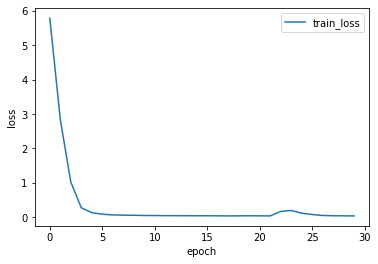

In [37]:
plt.plot(trained_model.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(["train_loss","test_loss"])
plt.show()

In [38]:
#testing the model
x_test

2001    i trouble alarm time work timer end alexa keep...
943     i bought replace dot living room speaker sligh...
1611    i bought go security camera system perform lik...
403                              great product work great
1301    absolutely love after much persuasion friend i...
                              ...                        
993     it extremely useful simple thing like spotify ...
1270                          this echo spot great i love
1398    i love product disappointed i realized i longe...
527     these great i bought one bought another right ...
2174                                 i liked linked prime
Name: verified_reviews, Length: 630, dtype: object

In [39]:
sequences_matrix_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 287,
        49,  25,   6, 187, 947,   5, 183, 499])

In [40]:
sequences_matrix_test[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
         39,  109,  455,  202,  234, 1266,    9,    1,  152,   26,    8,
       1878,  192,  450,  490,   37,    1,  111,  348,  819,  490,    3,
         32,  558,   76])

In [41]:
def create_model(model):
    y_pred=model.predict(sequences_matrix_test) #Y_pred=model.predict(x_test)
    y_pred = np.where(y_pred>=0.5,1,0)
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    print("Confusion matrix")
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    return model

In [42]:
create_model(model)

              precision    recall  f1-score   support

           0       0.49      0.37      0.42        46
           1       0.95      0.97      0.96       584

    accuracy                           0.93       630
   macro avg       0.72      0.67      0.69       630
weighted avg       0.92      0.93      0.92       630

Confusion matrix
[[ 17  29]
 [ 18 566]]


# LSTM

In [43]:
#create the object of Sequential class
#create the object of Sequential class
model1=Sequential()
model1.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model1.add(LSTM(128,activation='tanh'))  #tanh activation function use in sequential data (RNN)
model1.add(Dense(10,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
          

In [44]:
from tensorflow import keras
opt=keras.optimizers.Adam(learning_rate=0.001)#specify learning rate  
#in adam learning rate we change as per our requirement to improve module accuracy
model1.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [45]:
trained_model1=model1.fit(sequence_matrix_train,y_train,epochs=30,batch_size=50)

Epoch 1/30
51/51 [==============================] - 18s 252ms/step - loss: 1.5195 - accuracy: 0.8976
Epoch 2/30
51/51 [==============================] - 12s 241ms/step - loss: 0.8737 - accuracy: 0.9183
Epoch 3/30
51/51 [==============================] - 13s 246ms/step - loss: 0.4919 - accuracy: 0.9302
Epoch 4/30
51/51 [==============================] - 13s 248ms/step - loss: 0.2782 - accuracy: 0.9647
Epoch 5/30
51/51 [==============================] - 13s 255ms/step - loss: 0.1973 - accuracy: 0.9786
Epoch 6/30
51/51 [==============================] - 12s 234ms/step - loss: 0.1599 - accuracy: 0.9857
Epoch 7/30
51/51 [==============================] - 12s 233ms/step - loss: 0.1300 - accuracy: 0.9885
Epoch 8/30
51/51 [==============================] - 13s 252ms/step - loss: 0.1102 - accuracy: 0.9905
Epoch 9/30
51/51 [==============================] - 12s 237ms/step - loss: 0.0980 - accuracy: 0.9909
Epoch 10/30
51/51 [==============================] - 12s 233ms/step - loss: 0.0873 - accura

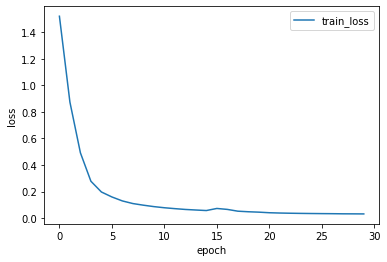

In [46]:
plt.plot(trained_model1.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(["train_loss"])
plt.show()

In [47]:
create_model(model1)

              precision    recall  f1-score   support

           0       0.71      0.54      0.62        46
           1       0.96      0.98      0.97       584

    accuracy                           0.95       630
   macro avg       0.84      0.76      0.80       630
weighted avg       0.95      0.95      0.95       630

Confusion matrix
[[ 25  21]
 [ 10 574]]


# GRU

In [48]:
#create the object of Sequential class
#create the object of Sequential class
model2=Sequential()
model2.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model2.add(GRU(128,activation='tanh'))  #tanh activation function use in sequential data (RNN)
model2.add(Dense(10,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model2.add(Dense(10,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
          

In [49]:
from tensorflow import keras
opt=keras.optimizers.Adam(learning_rate=0.001)#specify learning rate  
#in adam learning rate we change as per our requirement to improve module accuracy
model2.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [50]:
trained_model2=model2.fit(sequence_matrix_train,y_train,epochs=30,batch_size=50)

Epoch 1/30
51/51 [==============================] - 17s 213ms/step - loss: 1.4249 - accuracy: 0.9123
Epoch 2/30
51/51 [==============================] - 11s 217ms/step - loss: 0.7514 - accuracy: 0.9163
Epoch 3/30
51/51 [==============================] - 10s 192ms/step - loss: 0.3724 - accuracy: 0.9365s
Epoch 4/30
51/51 [==============================] - 11s 207ms/step - loss: 0.1859 - accuracy: 0.9817
Epoch 5/30
51/51 [==============================] - 10s 196ms/step - loss: 0.1320 - accuracy: 0.9845s - los
Epoch 6/30
51/51 [==============================] - 11s 224ms/step - loss: 0.1146 - accuracy: 0.9857
Epoch 7/30
51/51 [==============================] - 11s 224ms/step - loss: 0.0955 - accuracy: 0.9873
Epoch 8/30
51/51 [==============================] - 11s 225ms/step - loss: 0.0824 - accuracy: 0.9885
Epoch 9/30
51/51 [==============================] - 11s 223ms/step - loss: 0.0695 - accuracy: 0.9913
Epoch 10/30
51/51 [==============================] - 11s 214ms/step - loss: 0.0618 

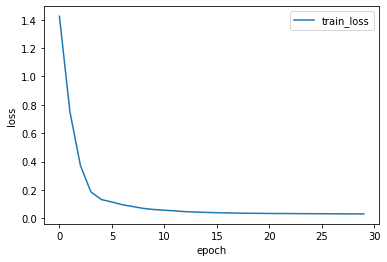

In [51]:
plt.plot(trained_model2.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(["train_loss"])
plt.show()

In [52]:
create_model(model2)

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        46
           1       0.96      0.98      0.97       584

    accuracy                           0.94       630
   macro avg       0.80      0.74      0.77       630
weighted avg       0.94      0.94      0.94       630

Confusion matrix
[[ 23  23]
 [ 13 571]]


# by averging output of three model

In [53]:
y_pred1=model.predict(sequences_matrix_test) #Y_pred=model.predict(x_test)
y_pred2=model1.predict(sequences_matrix_test) #Y_pred=model.predict(x_test)
y_pred3=model2.predict(sequences_matrix_test) #Y_pred=model.predict(x_test)
y_pred=np.round(((y_pred1+y_pred2+y_pred3)/3),3)

In [54]:
y_pred = np.where(y_pred3>=0.5,1,0)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Confusion matrix")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        46
           1       0.96      0.98      0.97       584

    accuracy                           0.94       630
   macro avg       0.80      0.74      0.77       630
weighted avg       0.94      0.94      0.94       630

Confusion matrix
[[ 23  23]
 [ 13 571]]


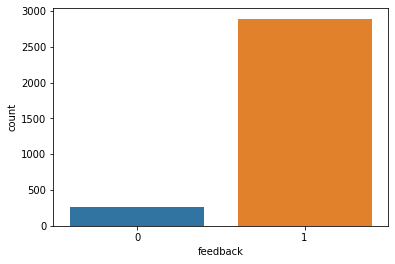

In [55]:
sns.countplot(data=df,x="feedback")

## balancing dataset

In [56]:
from imblearn.over_sampling import RandomOverSampler

In [57]:
ros=RandomOverSampler()

In [58]:
X_train,Y_train=ros.fit_resample(sequence_matrix_train,y_train)
X_test,Y_test=ros.fit_resample(sequences_matrix_test,y_test)

# LSTM

In [59]:
#create the object of Sequential class
#create the object of Sequential class
model3=Sequential()
model3.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model3.add(LSTM(128,activation='tanh'))  #tanh activation function use in sequential data (RNN)
model3.add(Dense(10,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model3.add(Dense(10,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))
          

In [60]:
from tensorflow import keras
opt=keras.optimizers.Adam(learning_rate=0.001)#specify learning rate  
#in adam learning rate we change as per our requirement to improve module accuracy
model3.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [61]:
trained_model3=model3.fit(X_train,Y_train,epochs=30,batch_size=50)

Epoch 1/30
93/93 [==============================] - 26s 229ms/step - loss: 1.2785 - accuracy: 0.8631
Epoch 2/30
93/93 [==============================] - 21s 227ms/step - loss: 0.3901 - accuracy: 0.9502
Epoch 3/30
93/93 [==============================] - 22s 233ms/step - loss: 0.1945 - accuracy: 0.9734
Epoch 4/30
93/93 [==============================] - 23s 247ms/step - loss: 0.1313 - accuracy: 0.9818
Epoch 5/30
93/93 [==============================] - 21s 231ms/step - loss: 0.1040 - accuracy: 0.9846
Epoch 6/30
93/93 [==============================] - 23s 245ms/step - loss: 0.0869 - accuracy: 0.9861
Epoch 7/30
93/93 [==============================] - 22s 233ms/step - loss: 0.0785 - accuracy: 0.9859
Epoch 8/30
93/93 [==============================] - 21s 229ms/step - loss: 0.0728 - accuracy: 0.9861
Epoch 9/30
93/93 [==============================] - 22s 236ms/step - loss: 0.0674 - accuracy: 0.9866
Epoch 10/30
93/93 [==============================] - 22s 238ms/step - loss: 0.0634 - accura

In [62]:
def create_model1(model):
    y_pred=model.predict(X_test) #Y_pred=model.predict(x_test)
    y_pred = np.where(y_pred>=0.5,1,0)
    from sklearn.metrics import classification_report
    print(classification_report(Y_test,y_pred))
    print("Confusion matrix")
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(Y_test,y_pred))

In [63]:
create_model1(model3)

              precision    recall  f1-score   support

           0       0.94      0.59      0.73       584
           1       0.70      0.96      0.81       584

    accuracy                           0.78      1168
   macro avg       0.82      0.78      0.77      1168
weighted avg       0.82      0.78      0.77      1168

Confusion matrix
[[346 238]
 [ 22 562]]


# RNN

In [64]:
#create the object of Sequential class
#create the object of Sequential class
model4=Sequential()
model4.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model4.add(SimpleRNN(64,activation='tanh'))  #tanh activation function use in sequential data (RNN)
model4.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model4.add(Dense(10,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1,activation='sigmoid'))
          

In [65]:
from tensorflow import keras
opt=keras.optimizers.Adam(learning_rate=0.001)#specify learning rate  
#in adam learning rate we change as per our requirement to improve module accuracy
model4.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [66]:
trained_model4=model4.fit(X_train,Y_train,epochs=30,batch_size=50)

Epoch 1/30
93/93 [==============================] - 9s 73ms/step - loss: 2.2471 - accuracy: 0.8361
Epoch 2/30
93/93 [==============================] - 7s 74ms/step - loss: 0.8483 - accuracy: 0.9708
Epoch 3/30
93/93 [==============================] - 7s 74ms/step - loss: 0.2981 - accuracy: 0.9831
Epoch 4/30
93/93 [==============================] - 7s 73ms/step - loss: 0.2120 - accuracy: 0.9792
Epoch 5/30
93/93 [==============================] - 7s 75ms/step - loss: 0.2007 - accuracy: 0.9690
Epoch 6/30
93/93 [==============================] - 7s 76ms/step - loss: 0.1473 - accuracy: 0.9790
Epoch 7/30
93/93 [==============================] - 7s 76ms/step - loss: 0.1336 - accuracy: 0.9818
Epoch 8/30
93/93 [==============================] - 7s 77ms/step - loss: 0.1209 - accuracy: 0.9844
Epoch 9/30
93/93 [==============================] - 8s 85ms/step - loss: 0.1181 - accuracy: 0.9825
Epoch 10/30
93/93 [==============================] - 8s 88ms/step - loss: 0.1153 - accuracy: 0.9781
Epoch 11/

In [67]:
create_model1(model4)

              precision    recall  f1-score   support

           0       0.93      0.54      0.68       584
           1       0.68      0.96      0.79       584

    accuracy                           0.75      1168
   macro avg       0.81      0.75      0.74      1168
weighted avg       0.81      0.75      0.74      1168

Confusion matrix
[[315 269]
 [ 22 562]]


# GRU

In [68]:
#create the object of Sequential class
#create the object of Sequential class
model5=Sequential()
model5.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model5.add(GRU(64,activation='tanh'))  #tanh activation function use in sequential data (RNN)
model5.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model5.add(Dense(10,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1,activation='sigmoid'))
          

In [69]:
from tensorflow import keras
opt=keras.optimizers.Adam(learning_rate=0.001)#specify learning rate  
#in adam learning rate we change as per our requirement to improve module accuracy
model5.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [70]:
trained_model5=model5.fit(X_train,Y_train,epochs=30,batch_size=50)

Epoch 1/30
93/93 [==============================] - 15s 104ms/step - loss: 2.2703 - accuracy: 0.8094
Epoch 2/30
93/93 [==============================] - 10s 104ms/step - loss: 0.7621 - accuracy: 0.9708
Epoch 3/30
93/93 [==============================] - 10s 105ms/step - loss: 0.2261 - accuracy: 0.9803
Epoch 4/30
93/93 [==============================] - 10s 105ms/step - loss: 0.1435 - accuracy: 0.9827
Epoch 5/30
93/93 [==============================] - 10s 106ms/step - loss: 0.1183 - accuracy: 0.9835
Epoch 6/30
93/93 [==============================] - 10s 108ms/step - loss: 0.1059 - accuracy: 0.9833
Epoch 7/30
93/93 [==============================] - 10s 110ms/step - loss: 0.0921 - accuracy: 0.9846
Epoch 8/30
93/93 [==============================] - 11s 122ms/step - loss: 0.0882 - accuracy: 0.9846
Epoch 9/30
93/93 [==============================] - 11s 115ms/step - loss: 0.0840 - accuracy: 0.9827
Epoch 10/30
93/93 [==============================] - 11s 113ms/step - loss: 0.0827 - accura

In [71]:
create_model1(model5)

              precision    recall  f1-score   support

           0       0.96      0.53      0.68       584
           1       0.67      0.98      0.80       584

    accuracy                           0.75      1168
   macro avg       0.82      0.75      0.74      1168
weighted avg       0.82      0.75      0.74      1168

Confusion matrix
[[308 276]
 [ 14 570]]


# conclusion: 
### without balancing the dataset LSTM model give highest recall  0.54 for 0 and 0.98 for 1.
### Due to imbalancing of data classification model take advantqages of majority class.
### if we collect more data for negative feedback then train the model it will give preety good result .
